In [ ]:
import data
from stable_baselines3 import PPO
from stable_baselines3 import SAC
from stable_baselines3 import DDPG
from environments import RastriginEnv
import matplotlib.pyplot as plt
import testing
import numpy as np

In [11]:
testing_functions = data.generate_dataset(n = 10, function_type = 'rastrigin_function', n_dims = 2)
env = RastriginEnv(functions = testing_functions, n_dims = 2)

In [12]:
ppo = PPO.load('Rastrigin_ppo')
sac = SAC.load('Rastrigin_sac')
ddpg = DDPG.load('Rastrigin_ddpg')
ppo.set_env(env=env)
sac.set_env(env=env)
ddpg.set_env(env=env)

0.01


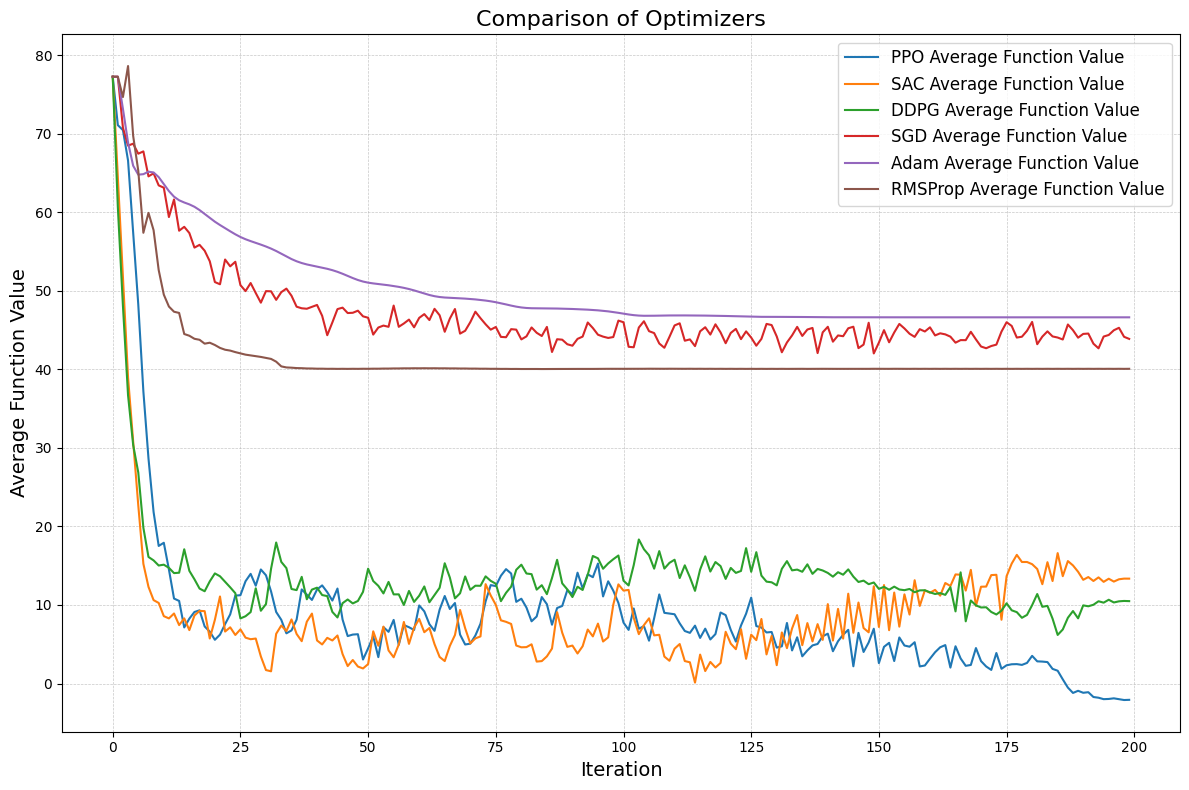

In [13]:
models = {
        'PPO': ppo,
        'SAC': sac,
        'DDPG': ddpg,
        'SGD': None,
        'Adam': None,
        'RMSProp': None,
    }
max_iterations = 200
results = testing.run_optimizer_tests(env, testing_functions, models, max_iterations = 200, function_type = 'rastrigin_function')
avg_values = testing.calculate_average_values(results)
testing.plot_results(avg_values, max_iterations)

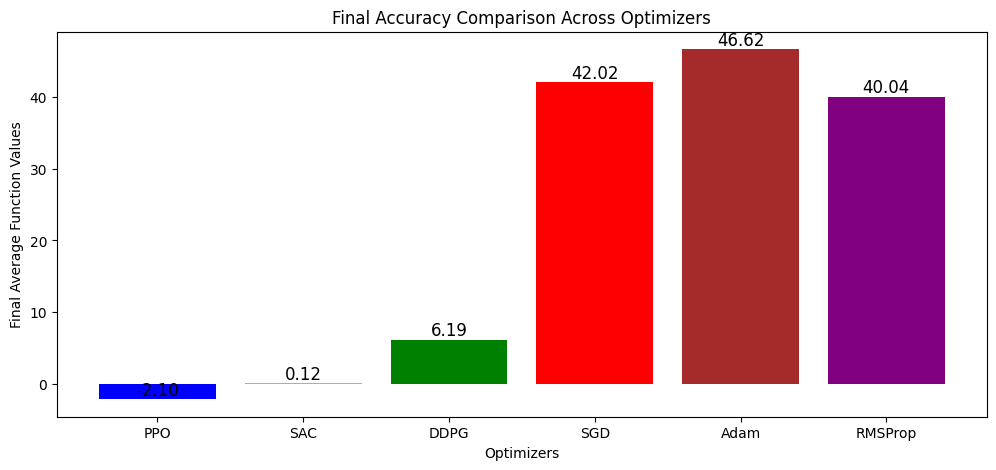

In [14]:
comparison = []
for model_name, data in avg_values.items():
    comparison.append((model_name, data.min()))
testing.plot_final_function_values(comparison)

In [6]:
def rastrigin_function(x, A=10, offset=0):
    """Computes the Rastrigin function in 2D with an offset."""
    x = np.asarray(x)
    shifted = x - offset
    return A * len(x) + np.sum(shifted**2 - A * np.cos(2 * np.pi * shifted))

def plot_rastrigin_contour_subplot(ax, A, offset, trajectory, title, x1_min, x1_max, x2_min, x2_max):
    """Generates a subplot of a Rastrigin function with a trajectory overlay."""
    x1_range = np.linspace(x1_min, x1_max, 300)
    x2_range = np.linspace(x2_min, x2_max, 300)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    Z = np.array([
        [rastrigin_function(np.array([x, y]), A=A, offset=offset) for x, y in zip(row_x, row_y)]
        for row_x, row_y in zip(X1, X2)
    ])

    contour = ax.contourf(X1, X2, Z, levels=30, cmap="viridis")
    
    ax.plot(trajectory[:, 0], trajectory[:, 1], 'r-o', markersize=3, linewidth=1, label="Trajectory")
    ax.scatter(trajectory[0, 0], trajectory[0, 1], color='green', s=50, label="Start Position", edgecolors='black', zorder=3)
    ax.scatter(trajectory[-1, 0], trajectory[-1, 1], color='blue', s=50, label="End Position", edgecolors='black', zorder=3)

    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_title(f'{title} Optimization Trajectory')
    ax.legend()

def plot_multiple_rastrigin_contours(results, function_params, number_of_iterations=200):
    """
    Plots multiple Rastrigin contours with trajectories from results dict.
    
    Parameters:
    - results: dictionary with model names and position arrays
    - function_params: tuple (A, offset) from the Rastrigin function
    - number_of_iterations: how many steps of the trajectory to show
    """
    methods = list(results.keys())
    num_methods = len(methods)
    rows = (num_methods + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    x1_min, x1_max, x2_min, x2_max = -10, 10, -10, 10
    A, offset = function_params
    
    axes = axes.flatten()
    for i, method in enumerate(methods):
        trajectory = results[method]['positions'][:number_of_iterations]
        plot_rastrigin_contour_subplot(axes[i], A, offset, trajectory, method, x1_min, x1_max, x2_min, x2_max)
    
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.show()

In [14]:
import data
testing_functions = [(10, np.array([-2.5,-2.5]))]
env = RastriginEnv(functions = testing_functions, n_dims = 2)
ppo.set_env(env=env)
sac.set_env(env=env)
ddpg.set_env(env=env)

In [15]:
testing_functions[0]

(10, array([-2.5, -2.5]))

0.01


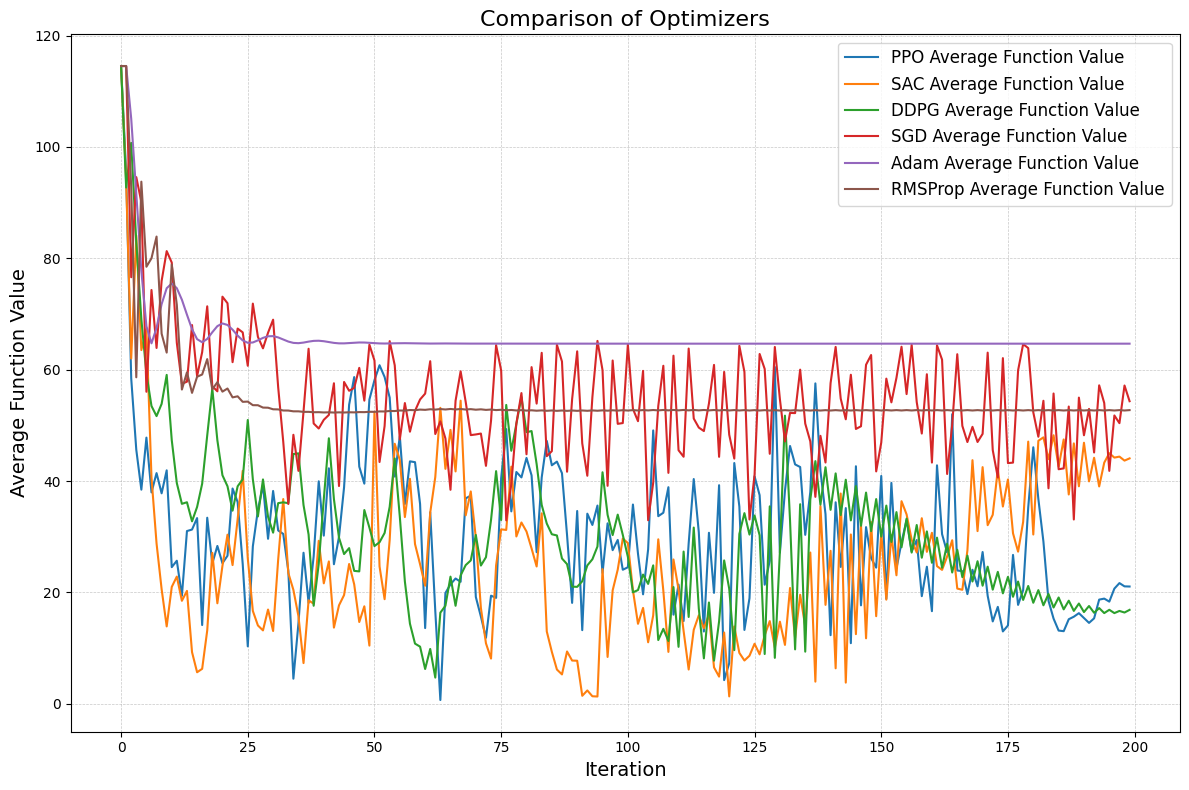

In [16]:
models = {
        'PPO': ppo,
        'SAC': sac,
        'DDPG': ddpg,
        'SGD': None,
        'Adam': None,
        'RMSProp': None,
    }
max_iterations = 200
results = testing.run_optimizer_tests(env, testing_functions, models, max_iterations = 200, function_type = 'rastrigin_function')
avg_values = testing.calculate_average_values(results)
testing.plot_results(avg_values, max_iterations)

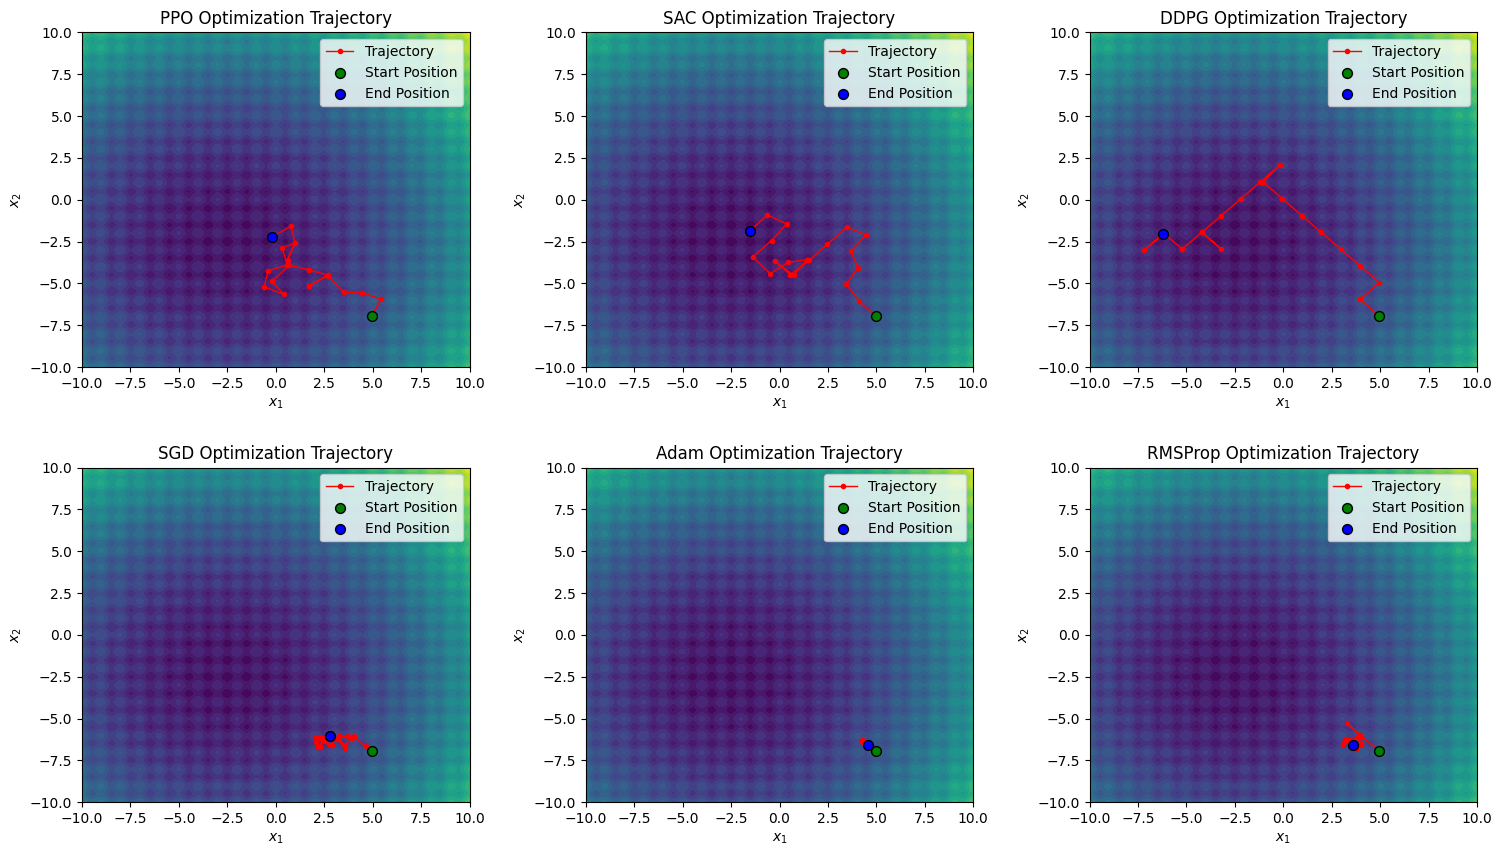

In [17]:
trajectory = results['PPO']['positions'][:200]
A, offset = testing_functions[0]
plot_multiple_rastrigin_contours(results, function_params=(A, offset), number_of_iterations=20)

In [18]:
print(offset)

[-2.5 -2.5]


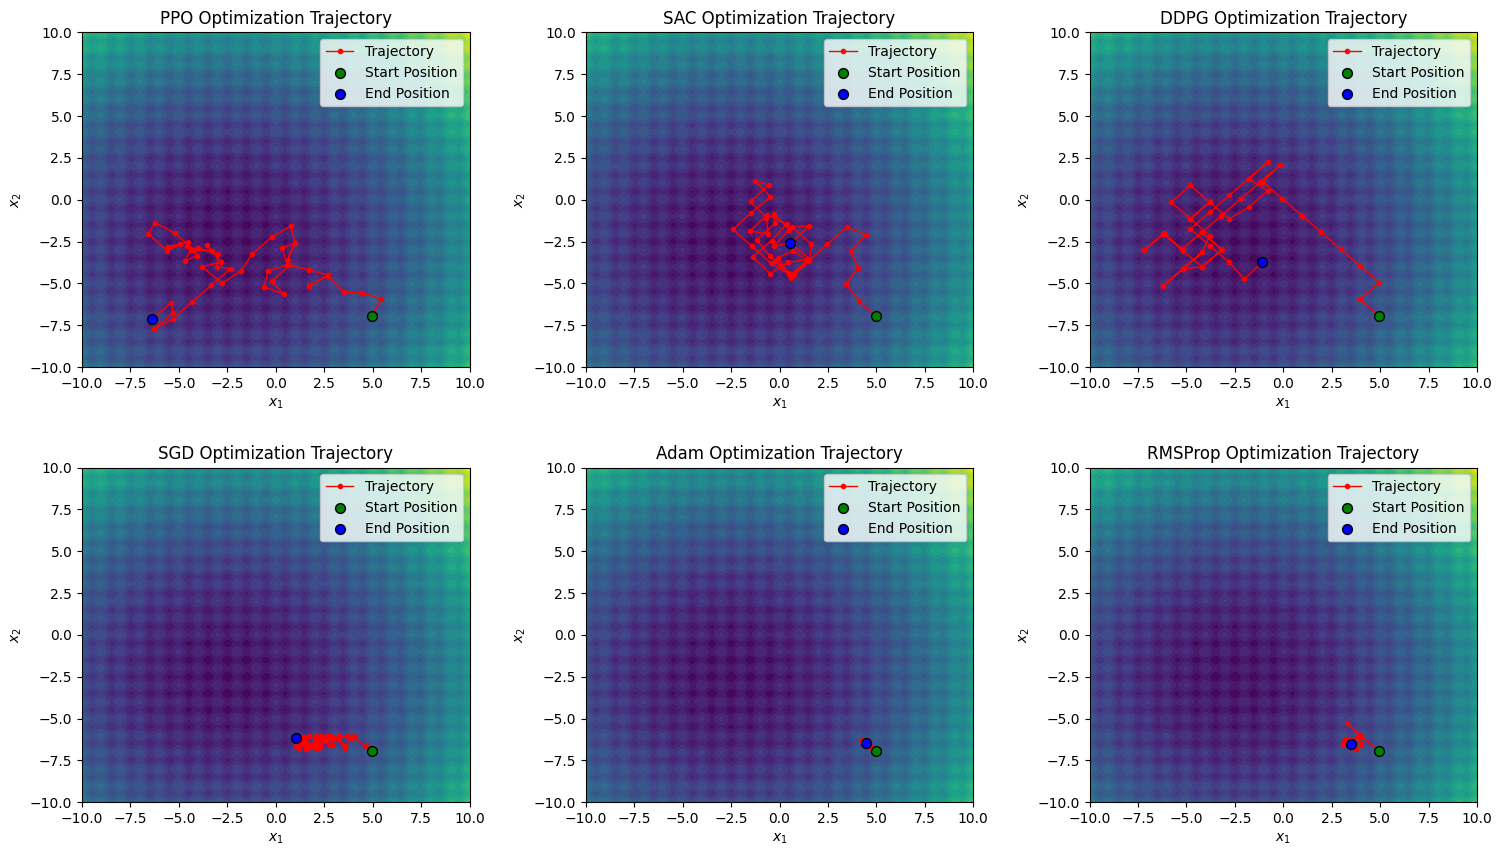

In [19]:
trajectory = results['PPO']['positions'][:200]
A, offset = testing_functions[0]
plot_multiple_rastrigin_contours(results, function_params=(A, offset), number_of_iterations=50)

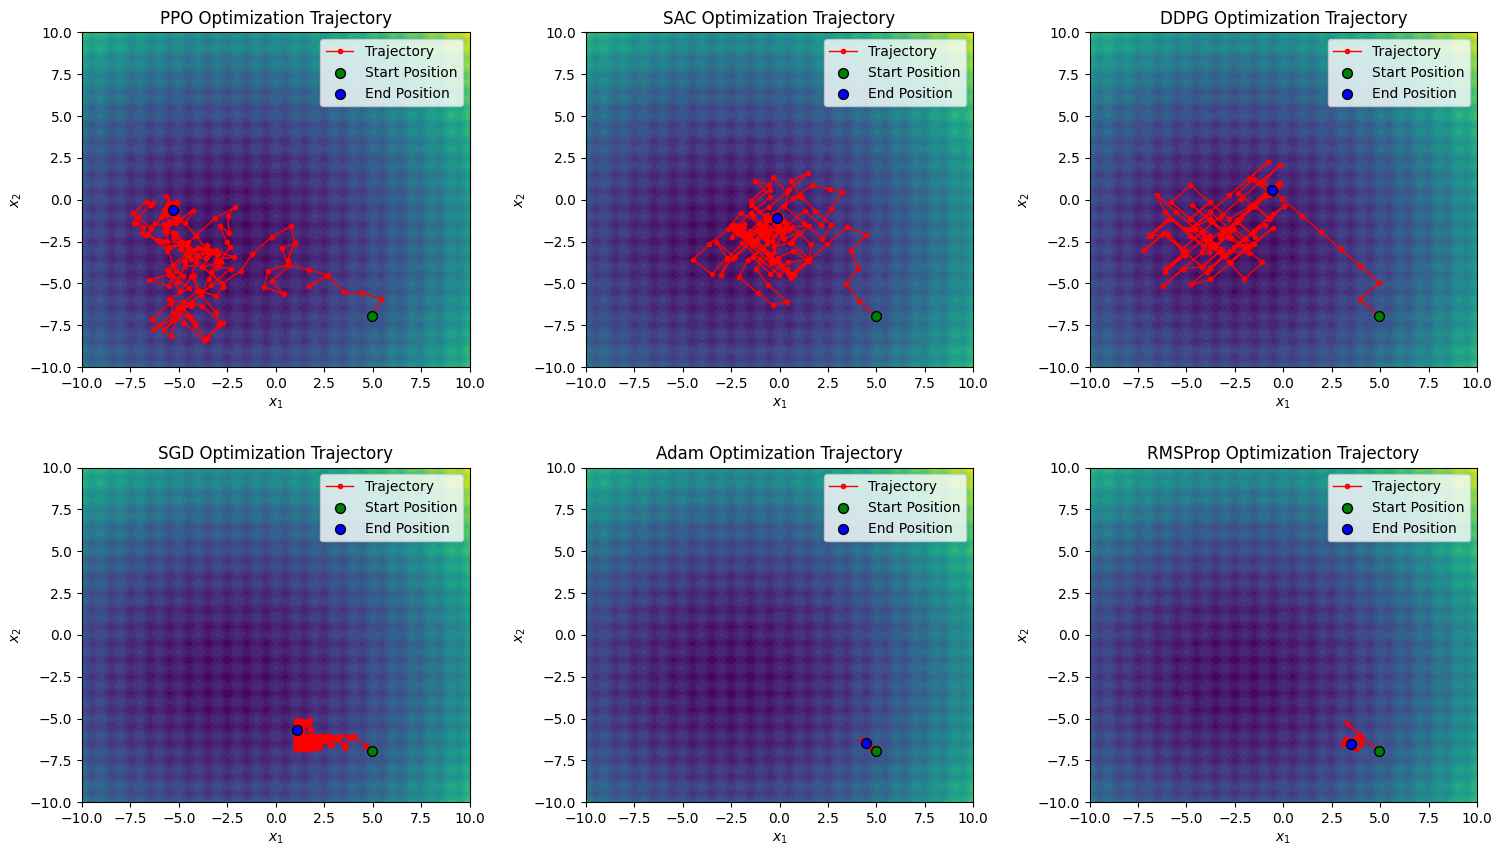

In [20]:
trajectory = results['PPO']['positions'][:200]
A, offset = testing_functions[0]
plot_multiple_rastrigin_contours(results, function_params=(A, offset), number_of_iterations=200)